# Evaluate likelihood ratio

In [3]:
import sys, os
import logging
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import chi2, norm

sys.path.append("../")
from inference.utils import s_from_r

## Data

In [8]:
filenames = [
    "carl_fix",
    "alices_fix",
    "carl_mass_pre",
    "alices_mass_pre",
    "carl_align_log",
    "alices_align_log",
]
labels = [
    "Fix:   CARL",
    "       ALICES",
    "Mass:  CARL-pre",
    "       ALICES-pre",
    "Align: CARL-log",
    "       ALICES-log",
]

nmethods = len(filenames)

In [9]:
llrs = np.asarray([np.load("../data/results/llr_{}_grid.npy".format(filename)) for filename in filenames])

In [10]:
idx = 356
log_r = llrs[:, idx, :]
s = s_from_r(np.exp(log_r))

log_r_all = llrs.reshape(llrs.shape[0], -1)
s_all = s_from_r(np.exp(log_r_all))

## Histograms

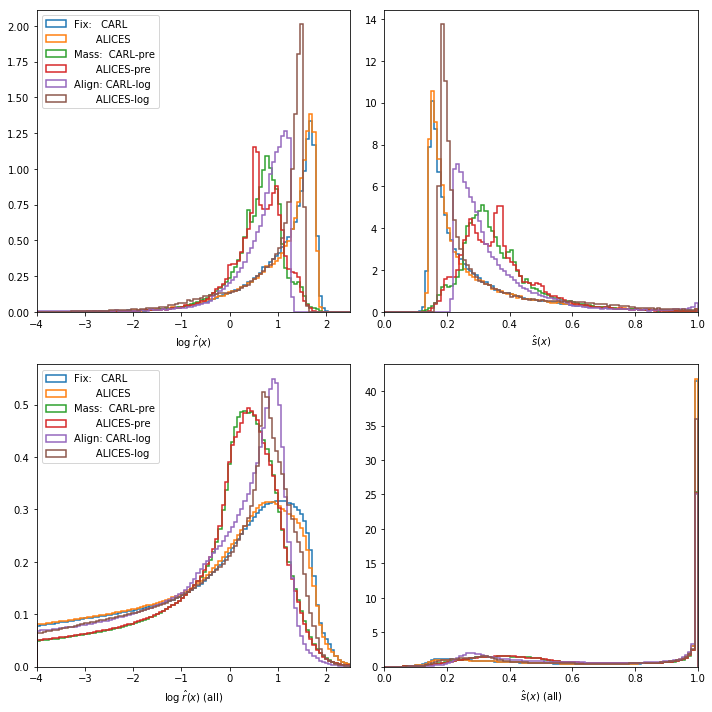

In [11]:
fig = plt.figure(figsize=(10., 10.))

ax = plt.subplot(2,2,1)
for i, x in enumerate(log_r):
    plt.hist(x, range=(-4., 2.5), bins=100, histtype="step", lw=1.5, color="C{}".format(i), density=True, label=labels[i])
plt.legend(loc="upper left")
plt.xlim(-4.,2.5)
plt.xlabel(r"$\log \; \hat{r}(x)$")

ax = plt.subplot(2,2,2)
for i, x in enumerate(s):
    plt.hist(x, range=(0., 1.), bins=100, histtype="step", lw=1.5, color="C{}".format(i), density=True)
plt.xlim(0.,1.)
plt.xlabel(r"$\hat{s}(x)$")

ax = plt.subplot(2,2,3)
for i, x in enumerate(log_r_all):
    plt.hist(x, range=(-4., 2.5), bins=100, histtype="step", lw=1.5, color="C{}".format(i), density=True, label=labels[i])
plt.legend(loc="upper left")
plt.xlim(-4.,2.5)
plt.xlabel(r"$\log \; \hat{r}(x)$ (all)")

ax = plt.subplot(2,2,4)
for i, x in enumerate(s_all):
    plt.hist(x, range=(0., 1.), bins=100, histtype="step", lw=1.5, color="C{}".format(i), density=True)
plt.xlim(0.,1.)
plt.xlabel(r"$\hat{s}(x)$ (all)")

plt.tight_layout()
plt.savefig("../figures/output_histo.pdf")
